<h1
    style="text-align: center; font-size: 30px; color: red; font-weight: bold; text-decoration: underline;">
      Exploratory Data Analysis (EDA) on Retail Sales Dataset
</h1>

## Project Overview:
In this project, I analyzed a dataset containing information about retail sales. The main objective was to conduct exploratory data analysis (EDA) to discover patterns, trends, and insights. The ultimate goal is to provide valuable infomation that can assist the retail business in making well-informed decisions for business.

In [161]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# Read Data
df = pd.read_csv(r'D:\Internship Projects\Oasis_Infobyte\Retailsale\retailsale.csv')

 #  Initial Data Exploration 

In [163]:
df.shape

(1000, 16)

In [164]:
pd.concat([df.head(3), df.tail(3)])

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,monthname,day,dayofweek,weekend,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November,24,Friday,False,31-45
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February,27,Monday,False,18-30
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January,13,Friday,False,46-60
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,October,29,Sunday,True,18-30
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,December,5,Tuesday,False,31-45
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120,2023,4,April,12,Wednesday,False,46-60


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
 9   year              1000 non-null   int64 
 10  month             1000 non-null   int64 
 11  monthname         1000 non-null   object
 12  day               1000 non-null   int64 
 13  dayofweek         1000 non-null   object
 14  weekend           1000 non-null   bool  
 15  age_group         1000 non-null   object
dtypes: bool(1), int64(8), object(7)
memory usage: 118.3+ KB


In [166]:
# Statistical View Of the numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
price_per_unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
total_amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0
year,1000.0,2023.002,0.044699,2023.0,2023.00,2023.0,2023.00,2024.0
month,1000.0,6.549,3.452755,1.0,4.00,6.0,10.00,12.0
day,1000.0,15.310,8.871674,1.0,7.00,15.0,23.00,31.0


In [167]:
# Statistical View Of the Object Data
df.describe(include = 'object').T

,count,unique,top,freq
date,1000,345,2023-05-16,11
customer_id,1000,1000,CUST001,1
gender,1000,2,Female,510
product_category,1000,3,Clothing,351
monthname,1000,12,May,105
dayofweek,1000,7,Tuesday,161
age_group,1000,5,46-60,331


In [168]:
#exploring the unique values of each column  
df.nunique()

transaction_id      1000
date                 345
customer_id         1000
gender                 2
age                   47
product_category       3
quantity               4
price_per_unit         5
total_amount          18
year                   2
month                 12
monthname             12
day                   31
dayofweek              7
weekend                2
age_group              5
dtype: int64

In [169]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount',
       'year', 'month', 'monthname', 'day', 'dayofweek', 'weekend',
       'age_group'],
      dtype='object')

#### 📌 Dataset Overview:
This dataset consists of 1,000 entries and 9 variables, with the following breakdown:
* **Numerical Variables:**      5
* **Categorical Variables:**    3
* **Date Variable:**       1

# Data Cleaning & Preprocessing

In [170]:
# Missing Values 
pd.isnull(df).sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
year                0
month               0
monthname           0
day                 0
dayofweek           0
weekend             0
age_group           0
dtype: int64

In [171]:
# Duplicate Values 
df.duplicated().sum()

0

In [172]:
# Garbage values
for i in df.select_dtypes(include = 'object').columns:
    print(df[i].value_counts())
    print("***"*5)

date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
              ..
2023-09-10     1
2023-02-16     1
2023-03-31     1
2023-01-25     1
2023-05-28     1
Name: count, Length: 345, dtype: int64
***************
customer_id
CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: count, Length: 1000, dtype: int64
***************
gender
Female    510
Male      490
Name: count, dtype: int64
***************
product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
***************
monthname
May          105
October       96
August        94
December      91
April         86
February      85
November      78
January       78
June          77
March         73
July          72
September     65
Name: count, dtype: int64
***************
dayofweek
Tuesday      161
Saturday     150
Monday       146
Friday       143
Wedn

In [173]:
# Column Standardization Process
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount',
       'year', 'month', 'monthname', 'day', 'dayofweek', 'weekend',
       'age_group'],
      dtype='object')

In [174]:
# Data type Correction 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
 9   year              1000 non-null   int64 
 10  month             1000 non-null   int64 
 11  monthname         1000 non-null   object
 12  day               1000 non-null   int64 
 13  dayofweek         1000 non-null   object
 14  weekend           1000 non-null   bool  
 15  age_group         1000 non-null   object
dtypes: bool(1), int64(8), object(7)
memory usage: 118.3+ KB


In [175]:
df.sample(2)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,monthname,day,dayofweek,weekend,age_group
133,134,2023-01-25,CUST134,Male,49,Electronics,1,50,50,2023,1,January,25,Wednesday,False,46-60
608,609,2023-12-19,CUST609,Female,47,Clothing,2,50,100,2023,12,December,19,Tuesday,False,46-60


In [176]:
# Convert Date to datetime
import warnings
warnings.filterwarnings("ignore")  

df['date'] = pd.to_datetime(df['date'])  
df['date'].dtype

dtype('<M8[ns]')

#### 📌Data Wrangling Summary:
* **Duplicates:** Ensured no duplicate records exist.
* **Missing Values:**  Confirmed no nulls or empty entries.
*  **Special Values:** No garbage values were detected.
* **Column Name Standardization:** Renamed columns to snake_case for consistency
* **Data Type Adjustments:** Converted date columns to datetime format 

# Outlier Detection and Treatment

In [177]:
df.select_dtypes(include="number").columns

Index(['transaction_id', 'age', 'quantity', 'price_per_unit', 'total_amount',
       'year', 'month', 'day'],
      dtype='object')

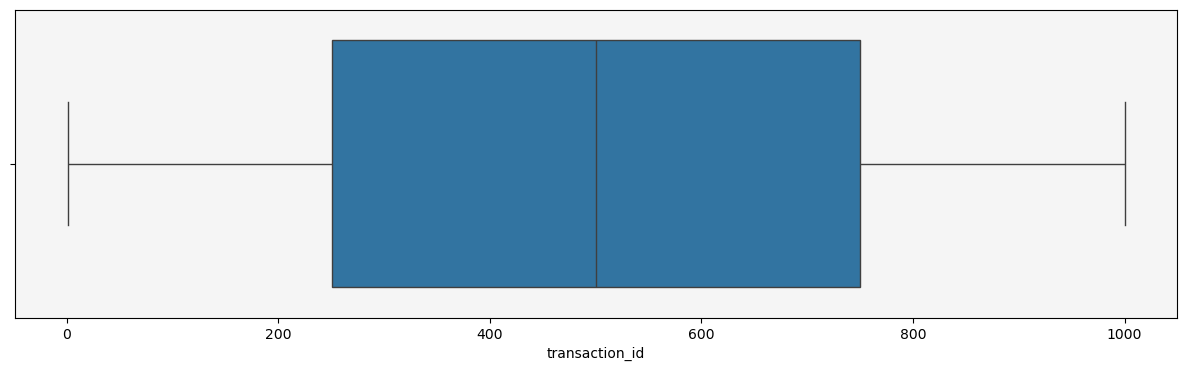

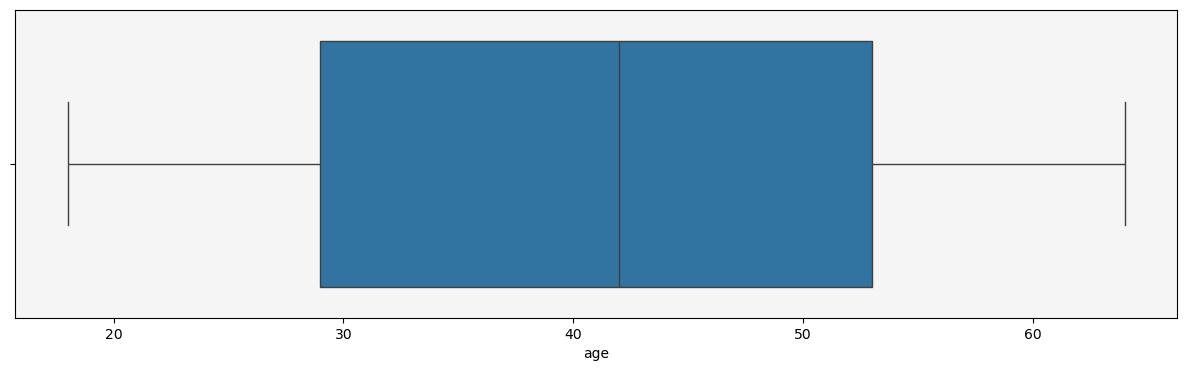

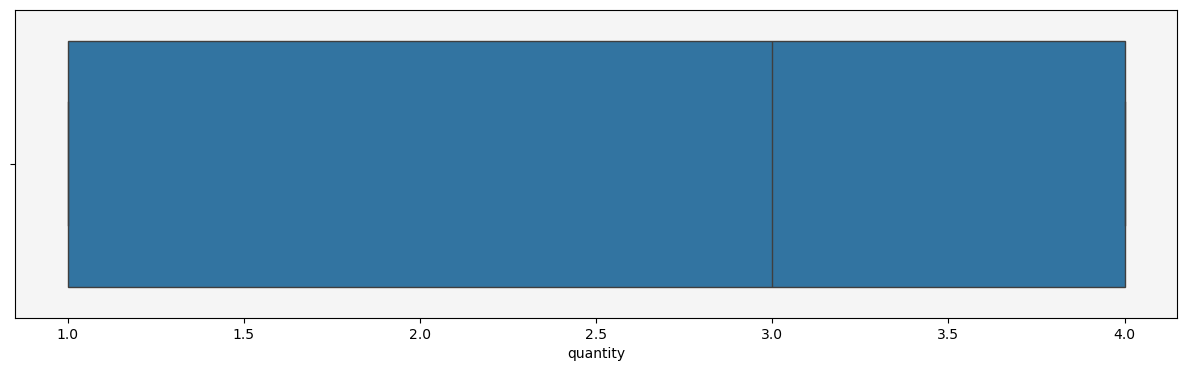

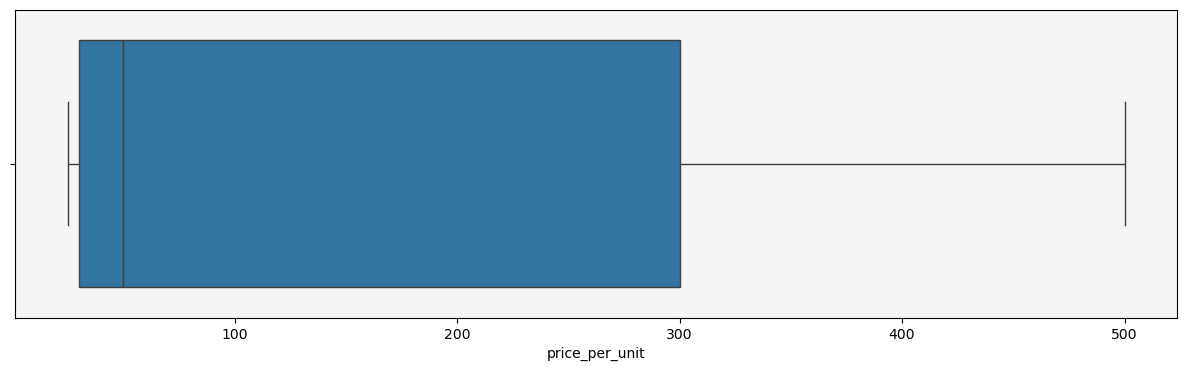

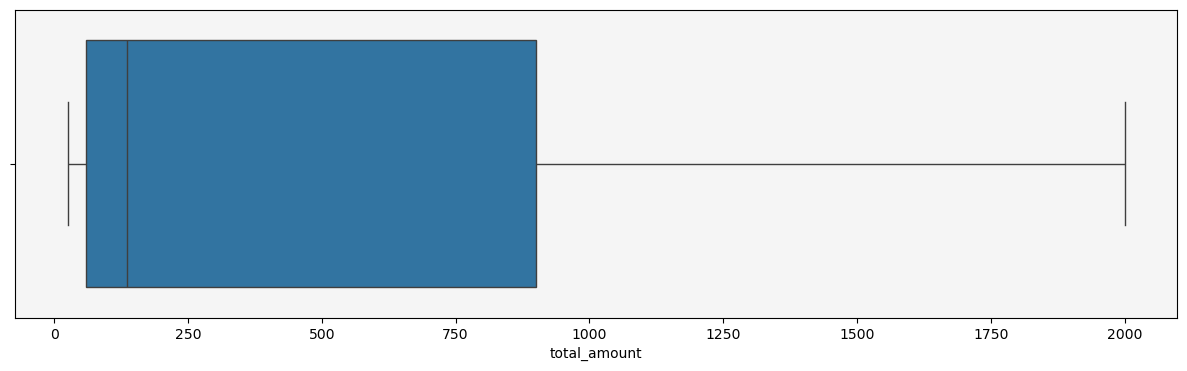

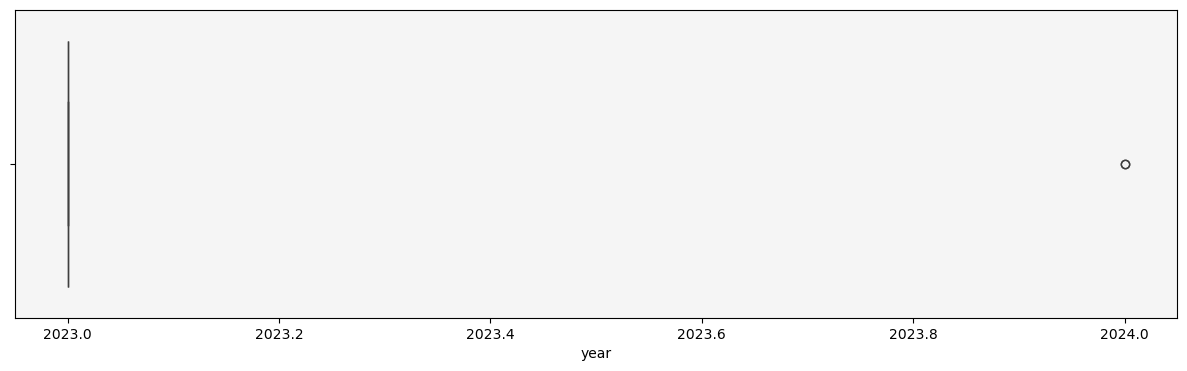

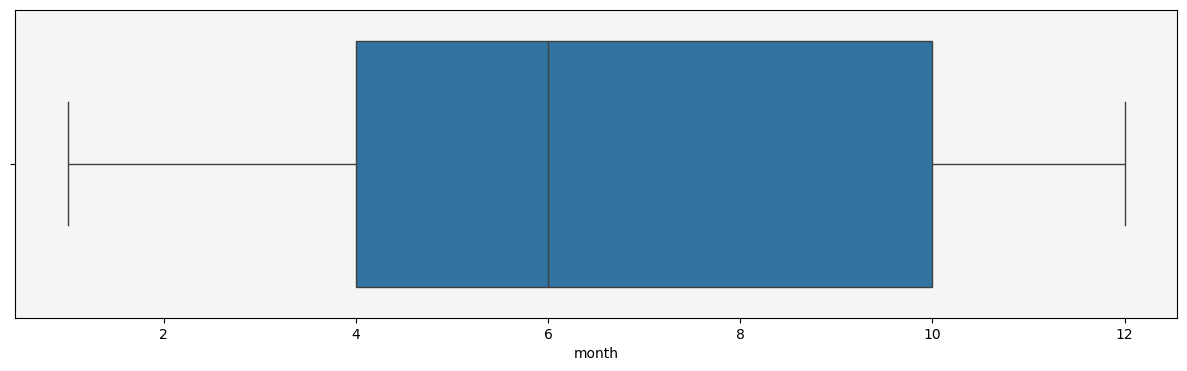

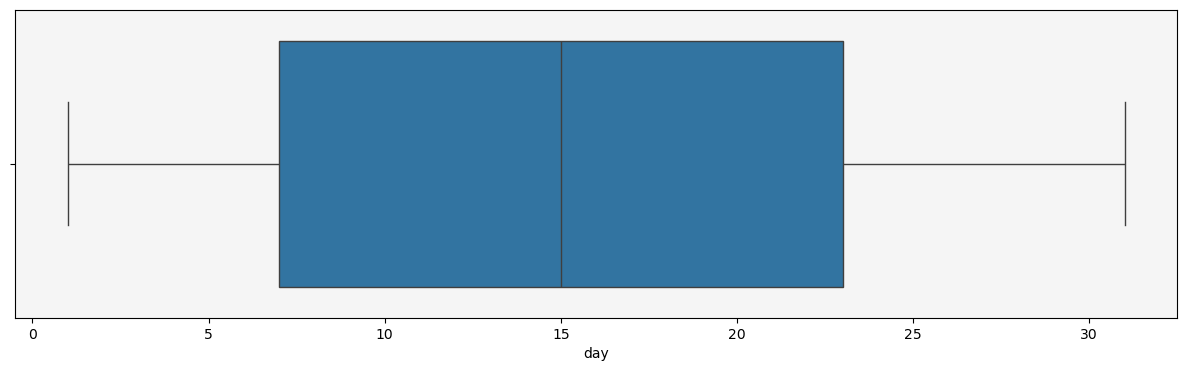

In [178]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15, 4)) 
    ax = sns.boxplot(data=df, x=i)
    ax.set_facecolor('whitesmoke')
    plt.show()

#### 📌 Outlier Analysis Note:
- As we can see from the boxplot, there are no outliers in this dataset.

# Feature Engineering 

In [179]:
# Create additional time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthname'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.day_name()
df['weekend'] = df['dayofweek'].isin(['Saturday', 'Sunday'])
df.head(2)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,monthname,day,dayofweek,weekend,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November,24,Friday,False,31-45
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February,27,Monday,False,18-30


In [180]:
# Create age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['below 18', '18-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
 9   year              1000 non-null   int32         
 10  month             1000 non-null   int32         
 11  monthname         1000 non-null   object        
 12  day               1000 non-null   int32         
 13  dayofweek         1000 non-null   object        
 14  weekend           1000 no

### 📌 Feature Engineering Summary:

* **Time Features:**
    Year | Month | Month Name | Day | Dayofweeek | Weekend 
* **Created age_group column with bins:**
     <18, 18-30, 31-40, 41-50, 51-60, 60+

#  Univariate Analysis

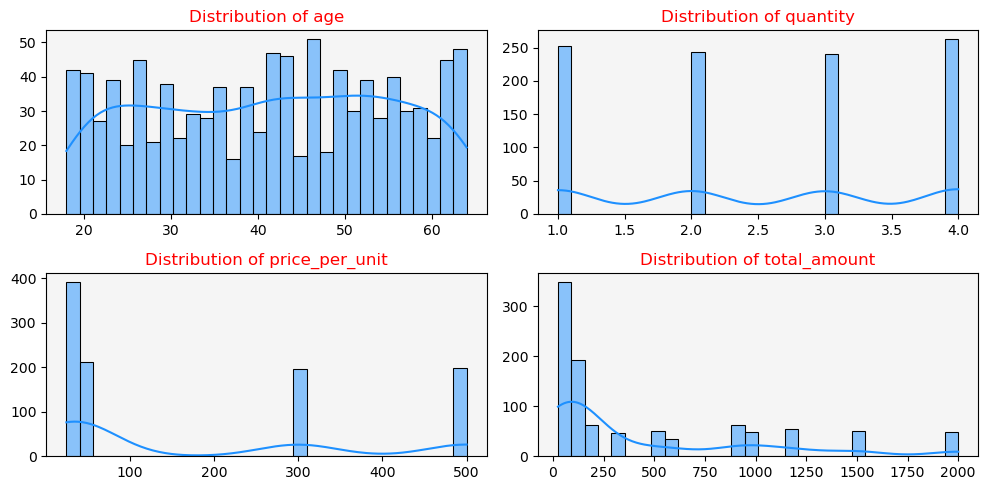

In [182]:
# Numerical Variables
num_cols = ['age', 'quantity', 'price_per_unit', 'total_amount']

plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    ax = sns.histplot(df[col], kde=True, bins=30, color= 'dodgerblue') # Kernel Density Estimate.
    plt.title(f'Distribution of {col}',color ='red')
    ax.set_facecolor('whitesmoke')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

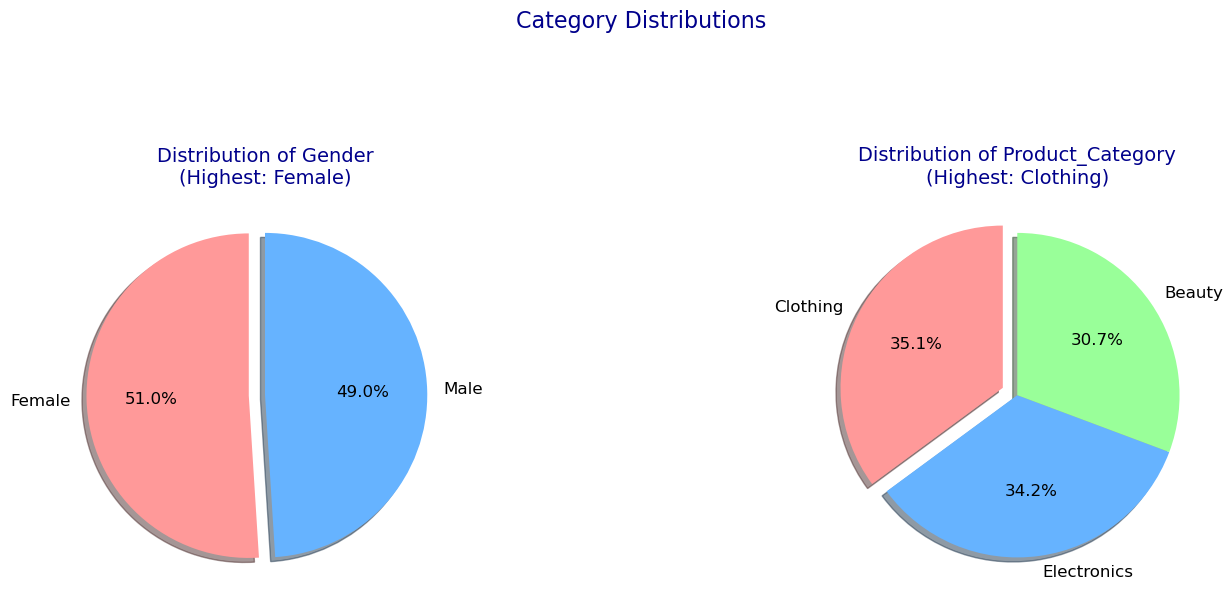

In [183]:
# Categorical Variables
cat_cols = ['gender', 'product_category']

plt.figure(figsize=(16, 6))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)  
    counts = df[col].value_counts()
    max_idx = counts.idxmax() 
    
    counts.plot.pie(
        autopct='%1.1f%%', 
        textprops={'fontsize': 12},
        explode=[0.1 if val == max_idx else 0 for val in counts.index],  
        shadow=True, 
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99']  )
    
    plt.title(f'Distribution of {col.title()}\n(Highest: {max_idx})', color='darkblue', size=14)
    plt.ylabel('') 

plt.suptitle('Category Distributions', fontsize=16, color='darkblue', y=1.05)
plt.tight_layout(pad=3.0)
plt.show()

- **Female** users make the majority of transactions
- **Clothing** is the dominant product category in transactions

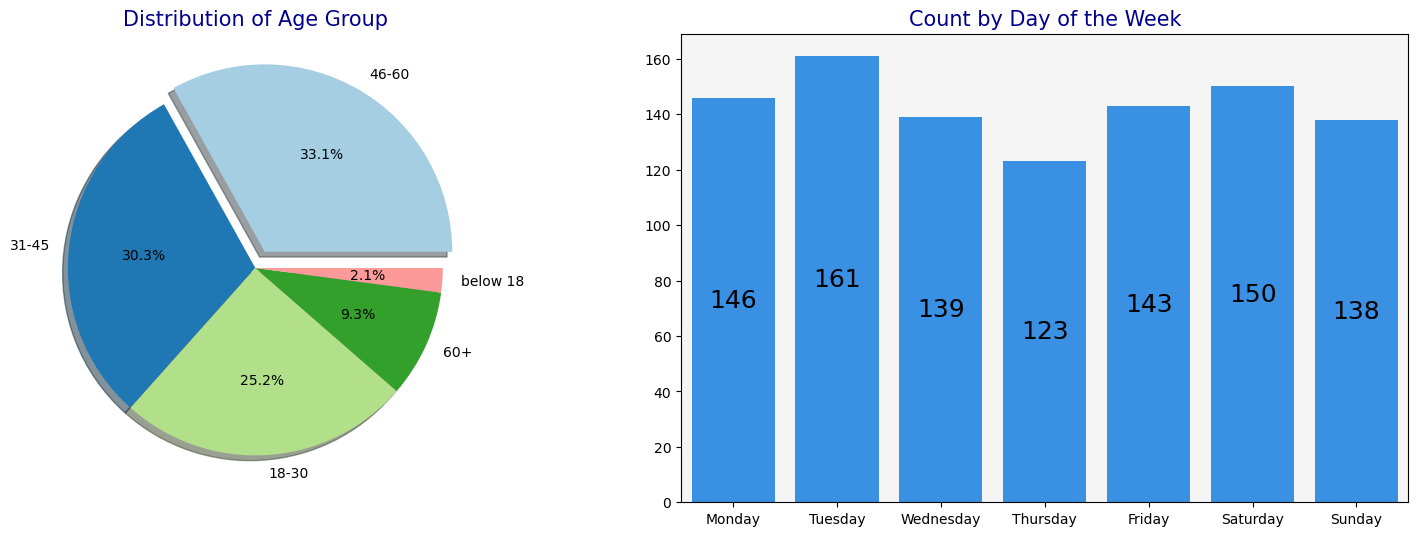

In [184]:
# age group

plt.figure(figsize=(16, 6))

ax = df['age_group'].value_counts()
plt.subplot(1, 2, 1)
max_idx = ax.idxmax() 
ax.plot.pie(autopct='%1.1f%%', fontsize=10, colors=plt.cm.Paired.colors, shadow=True
           , explode=[0.1 if val == max_idx else 0 for val in ax.index],  )
plt.title('Distribution of Age Group', color='darkblue', size=15)
plt.ylabel('')  

# Day Name

plt.subplot(1, 2, 2)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.countplot(data=df, x=df['dayofweek'],order=weekday_order, color = 'dodgerblue')
plt.title('Count by Day of the Week', color='darkblue', size=15)
ax.set_facecolor('whitesmoke')
plt.xticks(rotation=0, size = 10)
plt.xlabel('')
plt.ylabel('')

ax.bar_label(ax.containers[0], fmt='%d', fontsize=18, label_type='center')

plt.tight_layout(pad=3.0)
plt.show()


- Now we can see in this pai chart highest frequency of customers falls into the **30-45** and **46-60** age groups and **> 18** age group has the lowest frequency. 
- **Tuesday** is the peak day

# Bivariate Analysis

In [185]:
df.sample()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,monthname,day,dayofweek,weekend,age_group
235,236,2023-04-28,CUST236,Female,54,Clothing,1,25,25,2023,4,April,28,Friday,False,46-60


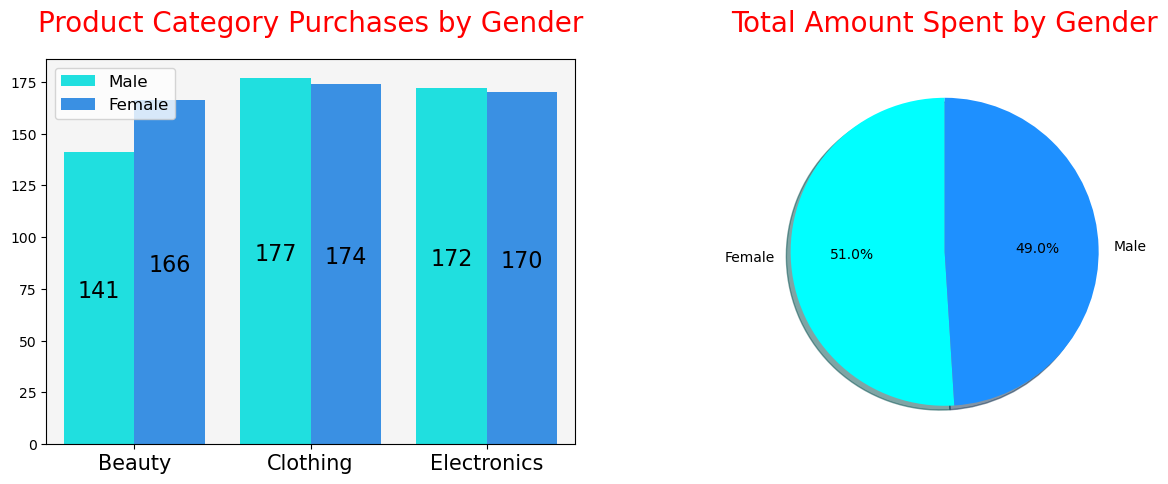

In [186]:
# Gender Analysis
plt.figure(figsize=(15, 5))

# Gender vs product_category
plt.subplot(1, 2, 1)
ax = sns.countplot(df, x='product_category', hue='gender', palette=['cyan', 'dodgerblue'])
ax.set_facecolor('whitesmoke')
plt.title('Product Category Purchases by Gender', color='red', size=20, pad=20)
plt.xticks(rotation=0, size = 15)
plt.xlabel('')
plt.ylabel('')
plt.legend( fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars, color='black', size=16, label_type='center', padding=5)


# Gender vs total_amount (Pie Chart Version)
plt.subplot(1, 2, 2)
total = df.groupby('gender')['total_amount'].count()
plt.pie(total, labels=total.index, colors=['cyan', 'dodgerblue'], autopct='%1.1f%%', startangle=90,shadow=True)

plt.title('Total Amount Spent by Gender', color='red', size=20, pad = 20)
plt.show()

In [187]:
# monthly Transaction count & Sale analysis

monthly_sales = df.resample('M', on='date')['total_amount'].sum()
monthly_transaction = df.resample('M', on='date')['transaction_id'].count()
month_name = monthly_sales.index.strftime('%b-%y')

month_table = pd.DataFrame({
    'month_name': month_name.values,
    'transactions_count': monthly_transaction.values,
    'total_sales': monthly_sales.values})

month_table

,month_name,transactions_count,total_sales
0,Jan-23,76,35450
1,Feb-23,85,44060
2,Mar-23,73,28990
3,Apr-23,86,33870
4,May-23,105,53150
5,Jun-23,77,36715
6,Jul-23,72,35465
7,Aug-23,94,36960
8,Sep-23,65,23620
9,Oct-23,96,46580


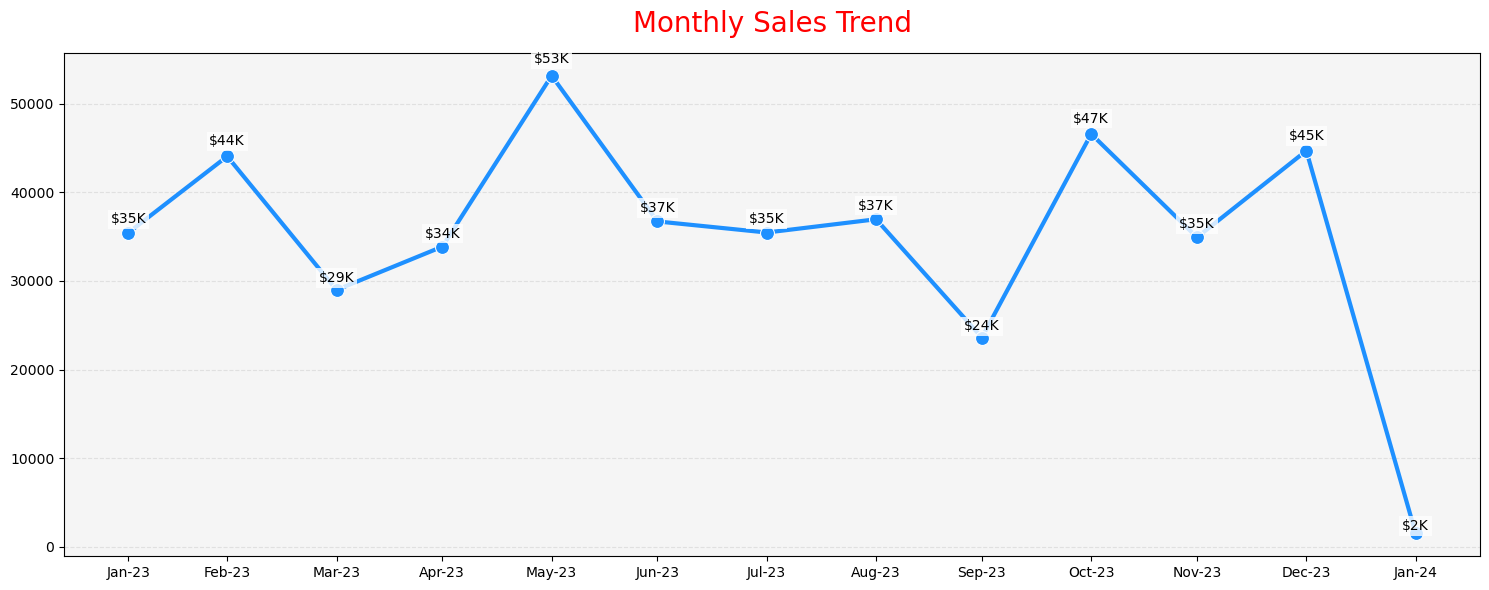

In [188]:
# Time Analysis - Monthly Sales Trend
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', markersize=10, linewidth=3, color='dodgerblue')

ax.set_facecolor('whitesmoke')
plt.title('Monthly Sales Trend', color='red', size=20, pad=15)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', alpha=0.3, linestyle='--')

ax.set_xticks(monthly_sales.index)
ax.set_xticklabels(monthly_sales.index.strftime('%b-%y'))

for x, y in zip(monthly_sales.index, monthly_sales.values):
    ax.text(x, y*1.02, f'${y/1000:,.0f}K',  # Slightly above the point
           ha='center', va='bottom', 
           fontsize=10, 
           color='black',
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
    
plt.tight_layout()
plt.show()

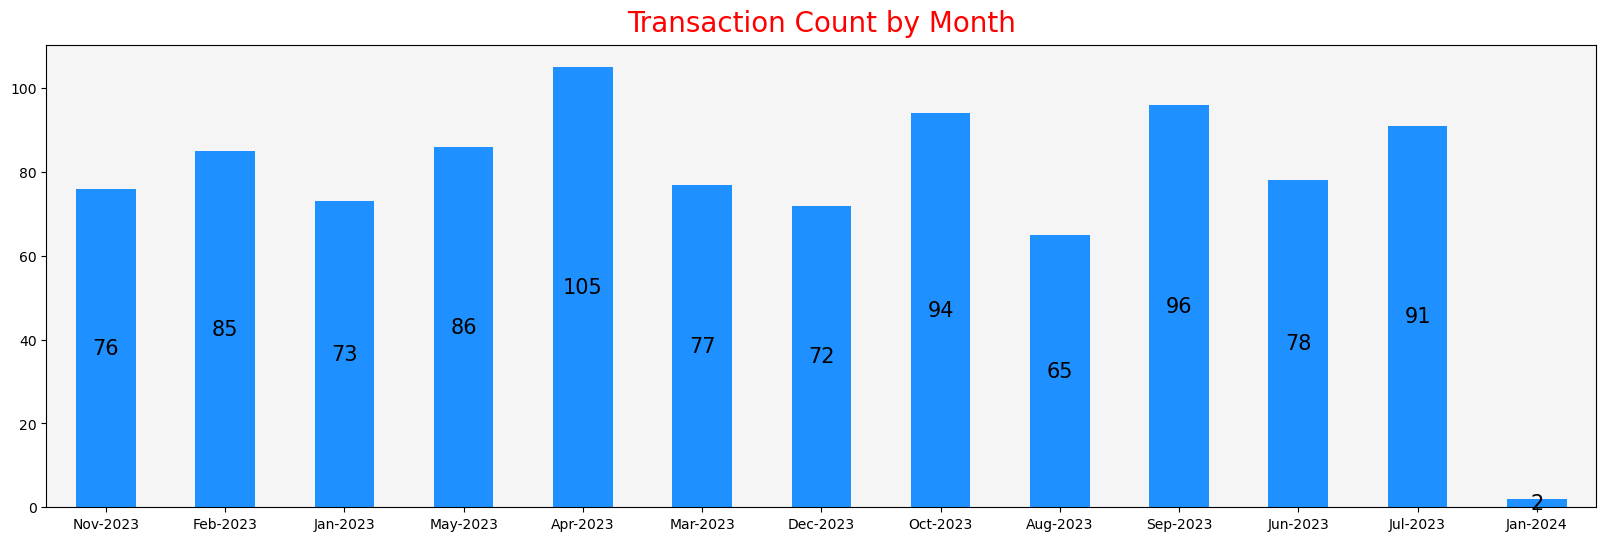

In [189]:
# month wise frequency
plt.figure(figsize=(20, 6))

ax = monthly_transaction.plot(kind='bar', color='dodgerblue')
labels = df['date'].dt.strftime('%b-%Y').unique()
ax.set_xticklabels(labels)

ax.set_facecolor('whitesmoke')
plt.title('Transaction Count by Month', color='red', size=20, pad=10)
plt.xlabel('')
plt.ylabel('')

for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues],
                 label_type='center', size=15)
    
plt.xticks(rotation=0)
plt.show()

In [190]:
weekdaynum = df['date'].dt.dayofweek + 1
total_customers = df.groupby(weekdaynum)['customer_id'].count()
total_sales = df.groupby(weekdaynum)['total_amount'].sum()
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_table = pd.DataFrame({
    'Weekday Number': total_customers.index,
    'Weekday Name': weekday_names,
    'Total Customers': total_customers.values,
    'Total Sales': total_sales.values
})

weekly_table

,Weekday Number,Weekday Name,Total Customers,Total Sales
0,1,Monday,146,70250
1,2,Tuesday,161,69440
2,3,Wednesday,139,58770
3,4,Thursday,123,53835
4,5,Friday,143,66290
5,6,Saturday,150,78815
6,7,Sunday,138,58600


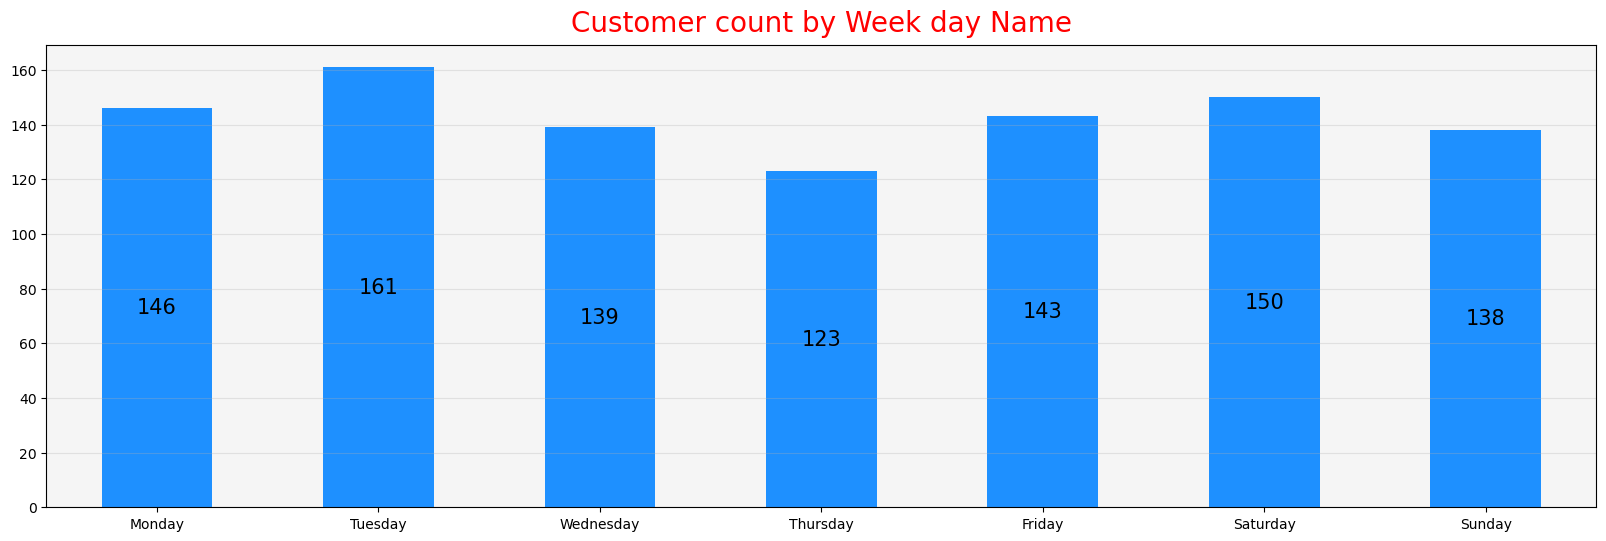

In [191]:
# Day of week analysis
plt.figure(figsize=(20, 6))
ax =total_customers.plot(kind='bar', color = 'dodgerblue')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', size=15) 
    
plt.title('Customer count by Week day Name', color = 'red',size = 20 , pad = 10)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
ax.set_facecolor('whitesmoke')

plt.grid( axis ="y", alpha = 0.3)
ax.set_xticklabels(weekday_names)
plt.show()

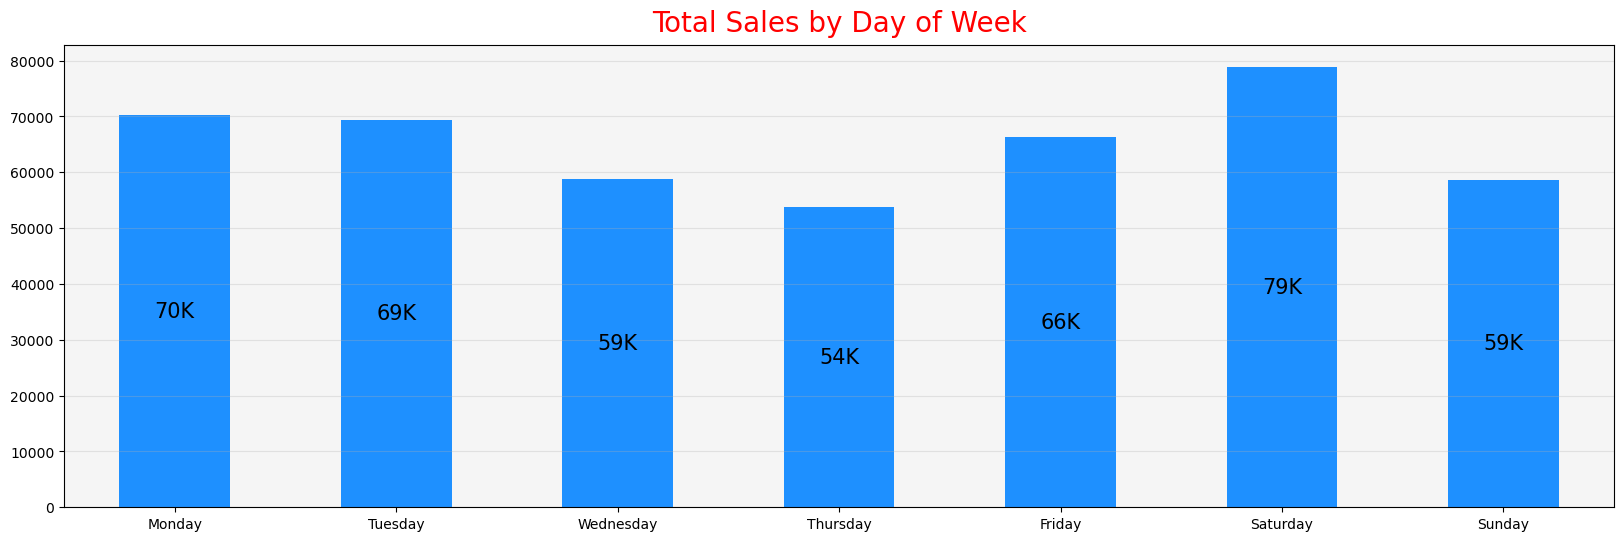

In [192]:
# Day of week analysis
plt.figure(figsize=(20, 6))
ax =total_sales.plot(kind='bar', color = 'dodgerblue')
ax.set_facecolor('whitesmoke')
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x/1000:.0f}K' for x in bars.datavalues],
                 label_type='center', size = 15) 
    
plt.title('Total Sales by Day of Week', color = 'red',size = 20 , pad = 10)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)

plt.grid( axis ="y", alpha = 0.3)
ax.set_xticklabels(weekday_names)
plt.show()

In [193]:
grouped = df.groupby('quantity')['customer_id'].count()
grouped

quantity
1    253
2    243
3    241
4    263
Name: customer_id, dtype: int64

 # Multivariate Analysis

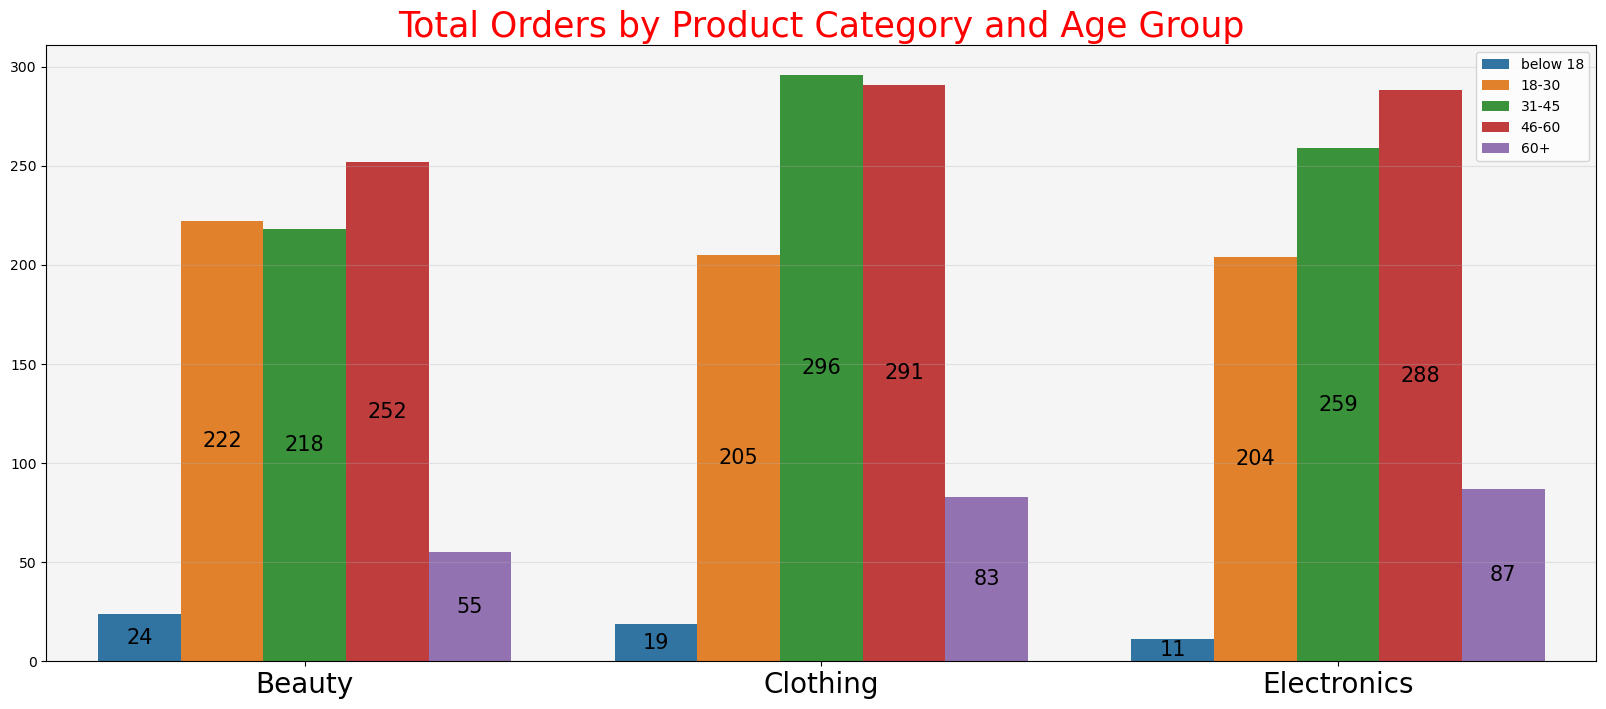

In [194]:
# Product category performance by age group

plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df, x='product_category', y='quantity', hue='age_group', estimator=sum , ci= False)
plt.title('Total Orders by Product Category and Age Group', color = 'red', size = 25)
plt.xticks(rotation=0, size = 20)
plt.legend( loc='upper right')
ax.set_facecolor('whitesmoke')
plt.xlabel('')
plt.ylabel('')
for bars in ax.containers:
    ax.bar_label(bars, 
                 label_type='center', size = 15) 
plt.grid(axis='y', alpha=0.3)
plt.show()

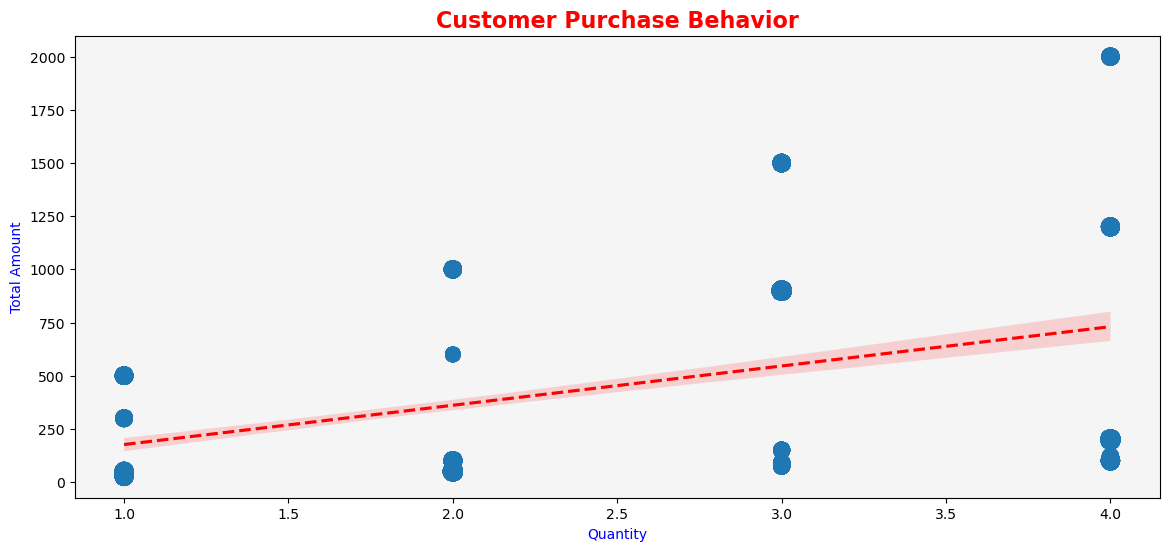

In [204]:
plt.figure(figsize=(14,6))
ax = sns.regplot(x='quantity', y='total_amount', data=df,
                scatter_kws={'s':df.groupby(['quantity','total_amount'])['customer_id'].transform('count')*3,
                            'alpha':0.6},
                line_kws={'color':'red', 'linestyle':'--'})
ax.set_facecolor('whitesmoke')
plt.title('Customer Purchase Behavior', fontsize=16, color='red', fontweight='bold')
plt.xlabel('Quantity', color = 'blue')
plt.ylabel('Total Amount',color = 'blue')
plt.show()

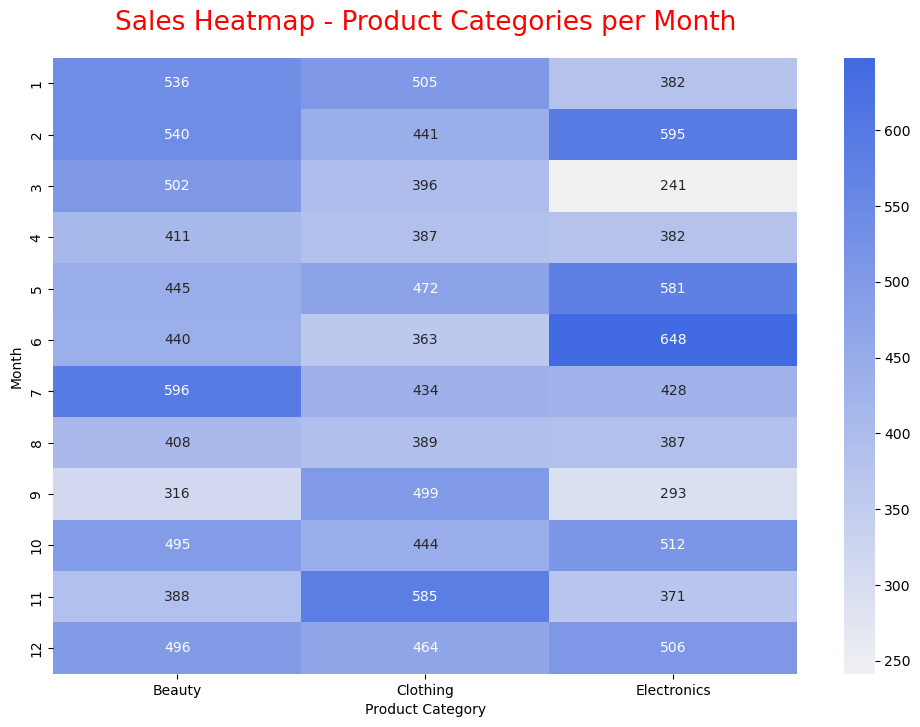

In [196]:
#showing a heatmap to analyze sales of product categories per month
plt.figure(figsize=(12,8))
heatmap = df.pivot_table(index='month',columns='product_category', values='total_amount')
custom_cmap = sns.light_palette('royalblue', as_cmap=True)
sns.heatmap(heatmap, annot=True, fmt='.0f',cmap=custom_cmap)
plt.title('Sales Heatmap - Product Categories per Month', fontsize=19, color = 'red', pad =20)
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

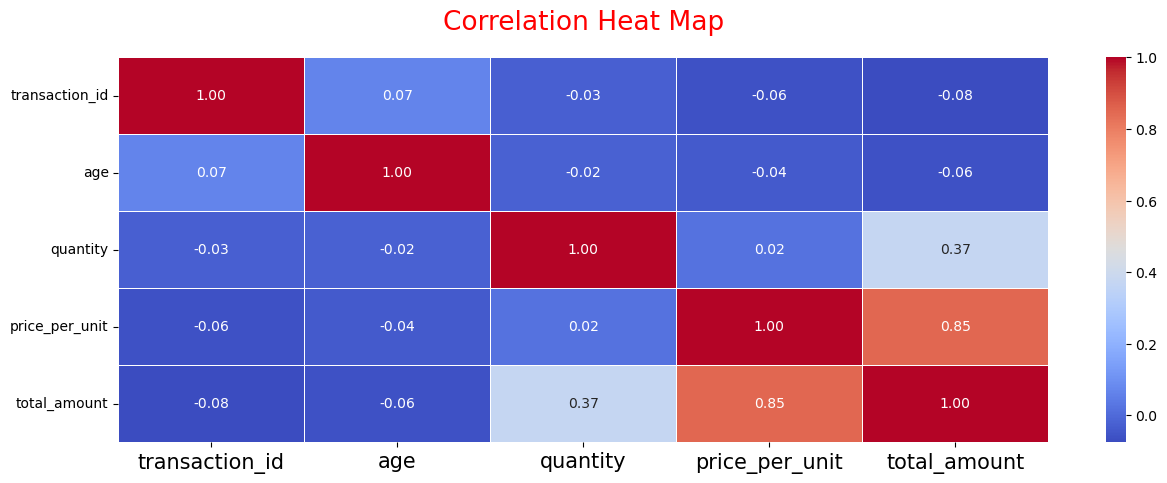

In [197]:
# Correlation matrix
correlation = df[df.select_dtypes(include=['int64']).columns].corr()

plt.figure(figsize=(15, 5))
ax = sns.heatmap(correlation, annot=True, annot_kws={'size': 10}, fmt='.2f', linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heat Map', fontsize=19, color = 'red', pad =20) 
plt.xticks(rotation=0, size = 15)
plt.show()

In [198]:
print(f"""
 Total Customers: {df['customer_id'].nunique():,}
 Date Range: {df['date'].min().strftime('%d-%b-%Y')} to {df['date'].max().strftime('%d-%b-%Y')}
 Total Sales: ${df['total_amount'].sum():,.0f}
 Total Quantity: {df['quantity'].sum():,.0f}
""")

# Key metrics by product category
product_stats = df.groupby('product_category').agg({
    'transaction_id': 'count',         
    'total_amount': 'sum',              
    'quantity': 'sum',                 
    'price_per_unit': ['mean', 'min', 'max']  }).round(2)
product_stats.columns = ['Transaction ', 'Revenue', 'Unit Sold', 'Avg Price', 'Min Price', 'Max Price']
display(product_stats)

# Key metrics by Gender
gender_stats = df.groupby('gender').agg({
    'transaction_id': 'count',         
    'total_amount': 'sum',              
    'quantity': 'sum',                 
    'price_per_unit': ['mean', 'min', 'max']  }).round(2)
gender_stats.columns = ['Transaction ', 'Revenue', 'Unit Sold', 'Avg Price', 'Min Price', 'Max Price']
display(gender_stats)

# Key metrics by Age Groups 
age_group_stats = df.groupby('gender').agg({
    'transaction_id': 'count',         
    'total_amount': 'sum',              
    'quantity': 'sum',                 
    'price_per_unit': ['mean', 'min', 'max']  }).round(2)
age_group_stats.columns = ['Transaction ', 'Revenue', 'Unit Sold', 'Avg Price', 'Min Price', 'Max Price']
display(age_group_stats)


 Total Customers: 1,000
 Date Range: 01-Jan-2023 to 01-Jan-2024
 Total Sales: $456,000
 Total Quantity: 2,514



,Transaction,Revenue,Unit Sold,Avg Price,Min Price,Max Price
product_category,,,,,,
Beauty,307,143515,771,184.06,25,500
Clothing,351,155580,894,174.29,25,500
Electronics,342,156905,849,181.90,25,500


,Transaction,Revenue,Unit Sold,Avg Price,Min Price,Max Price
gender,,,,,,
Female,510,232840,1298,180.07,25,500
Male,490,223160,1216,179.70,25,500


,Transaction,Revenue,Unit Sold,Avg Price,Min Price,Max Price
gender,,,,,,
Female,510,232840,1298,180.07,25,500
Male,490,223160,1216,179.70,25,500


In [199]:
# Save path for CSV
save_path = 'D:/Internship Projects/Oasis_Infobyte/Retailsale/retailsale.csv'

df.to_csv(save_path, index=False)
print("Data saved.")

Data saved.


#  Thank You!   